<a href="https://colab.research.google.com/github/rsaeed15/rsaeed15/blob/main/cdsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Title: 'Impact of State Fragility on Sovereign Credit Default Swap Pricing'
# Rifat Saeed

In [ ]:
# lfsi is analysed using Cohesion, Economic, Political, and Social indicators of Countries

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, neighbors 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
# Uploading spam csv file
from google.colab import files
uploaded = files.upload()

Saving cds_file_new.csv to cds_file_new.csv


In [3]:
# dataframe
import pandas as pd
import io
df = pd.read_csv(r'cds_file_new.csv',encoding='ISO-8859-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dp       660 non-null    int64  
 1   ref      660 non-null    int64  
 2   gg       660 non-null    int64  
 3   hf       660 non-null    int64  
 4   ud       660 non-null    int64  
 5   ped      660 non-null    int64  
 6   ls       660 non-null    int64  
 7   ps       660 non-null    int64  
 8   hr       660 non-null    int64  
 9   sa       660 non-null    int64  
 10  fe       660 non-null    int64  
 11  ei       660 non-null    int64  
 12  lfsi     660 non-null    int64  
 13  cds_bp   607 non-null    float64
 14  country  660 non-null    object 
 15  year     660 non-null    int64  
 16  conid    660 non-null    int64  
 17  fsi      660 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 92.9+ KB


In [5]:
df[1:14]

,dp,ref,gg,hf,ud,ped,ls,ps,hr,sa,fe,ei,lfsi,cds_bp,country,year,conid,fsi
1,4,2,4,4,5,5,3,4,4,2,3,3,4,589.0,Argentina,2008,1,41
2,4,2,5,4,6,5,3,4,4,2,3,3,4,2085.0,Argentina,2009,1,45
3,5,2,5,4,6,5,4,4,4,2,3,3,4,882.0,Argentina,2010,1,46
4,4,3,5,4,6,4,4,4,4,3,3,4,4,628.0,Argentina,2011,1,47
5,4,2,5,3,6,4,4,4,4,3,3,3,4,1021.0,Argentina,2012,1,46
6,4,2,5,3,6,4,4,4,4,3,3,4,4,2553.0,Argentina,2013,1,46
7,4,2,5,3,6,4,4,4,4,3,3,4,4,2547.0,Argentina,2014,1,47
8,4,2,5,3,5,5,5,4,4,4,3,4,4,2792.0,Argentina,2015,1,48
9,4,3,5,3,5,6,5,4,4,4,3,4,4,443.0,Argentina,2016,1,48
10,3,2,3,1,4,2,1,1,3,1,2,1,3,NaN,Australia,2007,2,23


In [6]:
# Dropping null values
df.dropna(inplace=True)


In [ ]:
# Null values
df.isna().sum()

dp         0
ref        0
gg         0
hf         0
ud         0
ped        0
ls         0
ps         0
hr         0
sa         0
fe         0
ei         0
lfsi       0
cds_bp     0
country    0
year       0
conid      0
fsi        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bar Plot of lfsi Values')

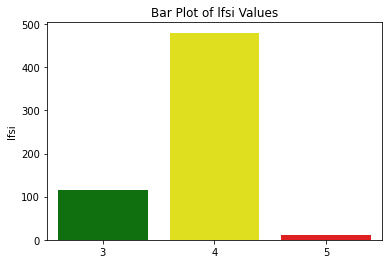

In [20]:
# Bar Plot of lfsi
x=df['lfsi'].value_counts()
clrs = ['green','yellow','red']
sns.barplot(x.index,x,palette=clrs).set_title('Bar Plot of lfsi Values')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Demographic Pressure')

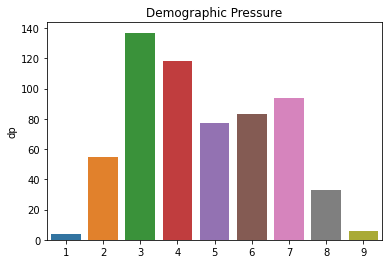

In [14]:
# Bar Plot of dp -- Demographic Pressure
x=df['dp'].value_counts()
sns.barplot(x.index,x).set_title('Demographic Pressure')

In [21]:
X=df.iloc[:,0:13].values ##### Input features
y=df.iloc[:,13].values  # Target variable

In [22]:
X[2]

array([4, 2, 5, 4, 6, 5, 3, 4, 4, 2, 3, 3, 4])

In [23]:
y[2]

2085.0

In [24]:
# Splitting the data into training and testing sets
from sklearn import preprocessing
import numpy as np
#X_n = preprocessing.normalize(X) # changed to 2D numpy array 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)  

In [25]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators =100, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Feature Importance
importances = list(100*rf.feature_importances_)

In [27]:
importances

[2.629242262838206,
 18.00460892051424,
 5.630261388047169,
 4.3157384246512915,
 18.91247869175,
 11.301884053580967,
 5.6496205408199565,
 5.672613521628587,
 6.176642050847959,
 2.7408801604117614,
 9.355137652162249,
 8.62107634806568,
 0.9898159846819304]

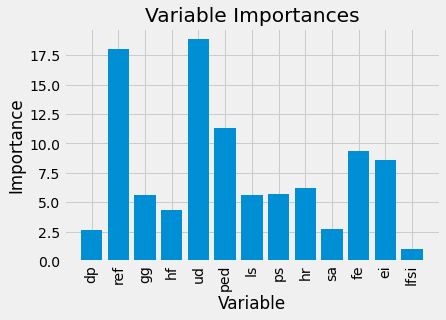

In [28]:
# Plotting Feature Importance
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, df.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');